# Week 2 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

Create a cell that converts all the units into natural units.

In [2]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
M_solar = 2e30 * kg

## 1. What are the estimates of $r_{s}$ and $\rho_{s}$ for the Milky-Way Halo?

To estimate the value of $r_{s}$, and assuming the spherical collapse model, we have 

\begin{align}
r_{s} = \frac{r_{vir}}{c_{vir}}
\end{align}

where $c_{vir} = 10$ for the Mily Way Halo and 

\begin{align}
r_{vir} = \left ( \frac{3M}{4 \pi \Delta_{vir}(z) \rho_{c}(z)} \right ) ^{1/3}.
\end{align}

In order to vind the expression for $r_{vir}$, we need to fill in the equations for $\Delta_{vir}(z)$ and $\rho_{c}(z)$. 

\begin{align}
\Delta_{vir} = 18 \pi^{2} + 82[\Omega_{m}(z) - 1] - 39[\Omega_{m}(z) - 1]^{2}
\end{align}

The first step is to therefore define $\Omega_{m}(z)$ which is 
\begin{align}
\frac{\Omega_{m,0}(1+z)^{3}}{\Omega_{m,0} (1+z)^{3} + \Omega_{\Lambda}}.
\end{align}

Once $\Omega_{m}(z)$ has been defined, we can move to defining the Hubble constant: 

\begin{align}
H(z) = \sqrt{H_{0}^{2} \left (\Omega_{m}(z) + \Omega_{\Lambda} \right )}
\end{align}

in order to calculate the critical density 
\begin{align}
\rho_{c} = \frac{2.77 \times 10^{11} h^{2} M_{\odot}}{\mathrm{Mpc}^{3}}.
\end{align}

With these values we can calculate the values for $r_{s}$ and $\rho_{s}$ using

\begin{align}
\rho_{s} = \frac{M}{4 \pi r_{s}^{3} \left ( \mathrm{ln}(1 + c_{vir}) - \frac{c_{vir}}{(1 + c_{vir})} \right )}.
\end{align}

These definitions have been taken from the lecture slides and from the Cosmology Lecture notes from Daniel Baumann. 

The Milky-Way halo has a mass of around 10$^{12}$ solar masses.
Define all the constants in a cell and convert them to the correct units.

In [3]:
M = 1e12*M_solar
a_0 = 1
h = 0.7
H_0 = h * 100 * km * s**(-1) * Mpc**(-1)
Omega_m0 = 0.32
Omega_Lambda = 0.68
c_vir = 10

Define the functions to calculate $\Omega_{\mathrm{m}}$, the Hubble constant $H$, $\Delta_{\mathrm{vir}}$, $\rho_{\mathrm{critical}}$, and $r_{\mathrm{vir}}$ in order to obtain values for $r_{s}$ and $\rho_{s}$ as explained above.

In [4]:
def Omega_m(z):
    return Omega_m0*(1+z)**3 / (Omega_m0*(1+z)**3 + Omega_Lambda)

def H(z):
    return np.sqrt(H_0**2 * (Omega_m(z) + Omega_Lambda))

def delta_vir(z):
    return 18*np.pi**2 + 82*(Omega_m(z) - 1) - 39*(Omega_m(z) - 1)**2

def rho_c(z):
    return 2.775e11*h**2*M_solar/Mpc**3

def r_vir(z):
    return (3*M)**(1/3) / (4*np.pi*delta_vir(z)*rho_c(z))**(1/3)

def r_s(z):
    return r_vir(z) / c_vir

def rho_s(z):
    denominator = np.log(1 + c_vir) - (c_vir/(1 + c_vir))
    return M / (denominator*4*np.pi*r_s(z)**3)

The values for $r_{s}$ in kpc and $\rho_{s}$ in GeV cm$^{-3}$ are

In [5]:
print('r_s   = {0:.3f} kpc'.format(r_s(0)/kpc))
print('rho_s = {0:.3f} GeV cm^-3'.format(rho_s(0)))

r_s   = 25.665 kpc
rho_s = 0.119 GeV cm^-3


## 2. How does $dJ/d\Omega$ look like as a function of angle subtending from the Galactic center $\psi$?

Starting with the definition of $dJ/d\Omega$, we have

\begin{align}
\frac{dJ}{d\Omega} = \int dl \rho^{2}(r(l, \Omega)).
\end{align}

In order to find what $dJ/d\Omega$ looks like as a function of the angle subtending from the Galactic center, we use the cosine rule to get 

\begin{align}
r^{2} = d_{GC}^{2} + l^{2} - 2ld_{GC}cos(\psi)cos(\theta).
\end{align}

and fill this into the equation for $\rho$ as given below.

\begin{align}
\rho = \frac{\rho_{s}}{\frac{r}{r_{s}} \left ( \frac{r}{r_{s}} + 1 \right )^{2}}
\end{align}

Define the distance to the galactic center and a maximum length for the line of sight. We are evaluating J at a redshift of 0 (today).

In [6]:
# SOME DEFINITIONS FOR OUR PROBLEM

d_gc = 8*kpc
l_max = 1e2*kpc
z = 0

In [7]:
# DEFINITION OF RHO AND RHO^2 FUNCTIONS

def rho(l, z, subt_angle, theta):
#     ANGLES IN RADIANS
    r    = np.sqrt(-2*l*d_gc*np.cos(subt_angle)*np.cos(theta) + d_gc**2 + l**2)
    return rho_s(z)/((r/r_s(z))*(r/r_s(z)+1)**2)


rho_2 = lambda l, z, subt_angle, theta: rho(l, z, subt_angle, theta)**2

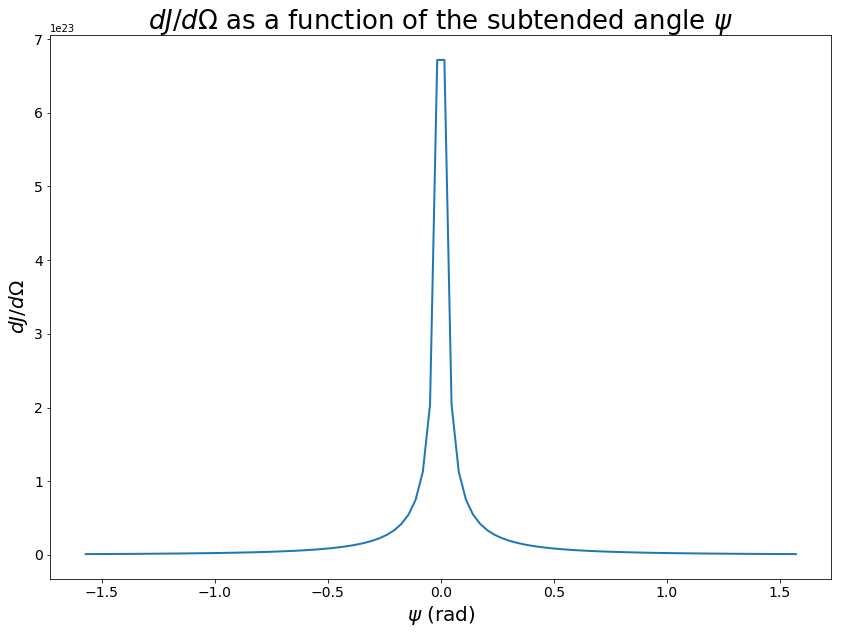

In [8]:
# DEFINITIONS
theta = 0
subt_angle_0 = np.pi/2
n_points_angle = 100
subt_angle = np.linspace(-subt_angle_0, subt_angle_0, n_points_angle)


# INTEGRAL
dJdΩ_int = np.vectorize(lambda z, subt_angle, theta: scipy.integrate.quad(rho_2, 0, l_max, args=(z, subt_angle, theta))[0])


# PLOT
fig, ax = plt.subplots(1, 1, figsize=(14,10))
ax.plot(subt_angle, dJdΩ_int(z, subt_angle, theta), lw=2)
ax.set_xlabel(r'$\psi$ (rad)', fontsize=20)
ax.set_ylabel(r'$dJ/d\Omega$', fontsize=20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title(r'$dJ/d\Omega$ as a function of the subtended angle $\psi$', fontsize=26)
# ax.set_xlim(-0.5, 0.5)
plt.show()

## 3. What is J around the Galactic center within 0.5 degree?

Use the Riemann sum as a technique to integrate to find the value for J. To do this, make a grid and calculate J for each segment of the grid and then take the average of all the values. 

In [9]:
# RIEMANN INTEGRAL --> FASTER THAN scipy.integrate.quad
def dJdΩ_riemann(subt_angle, theta):
    z = 0
    n_values = 1000
    
    l_values = np.linspace(0, l_max, n_values)
    dJdΩ_func = (rho_2(l_values[1:], z, subt_angle, theta) + rho_2(l_values[:-1], z, subt_angle, theta))*(l_values[1:]-l_values[:-1])/2
    return np.sum(dJdΩ_func)

In [10]:
# GRID DEFINITION
n_grid = 100
ang_max_deg = 0.5
ang_cell_size = ang_max_deg*2/100*3600
print('Angular cell size:  {0} x {0} arcseconds squared'.format(ang_cell_size, ang_cell_size))

ang_max = ang_max_deg * (2*np.pi/360)
xang_grid = np.linspace(-ang_max, ang_max, n_grid)
yang_grid = np.linspace(-ang_max, ang_max, n_grid)


# J FACTOR CALCULATION
J_arr = np.array([])
for theta in xang_grid:
    for phi in yang_grid:
        if (np.sin(theta)**2 + np.sin(phi)**2 <= np.sin(ang_max)**2):
            J_arr = np.append(J_arr, dJdΩ_riemann(phi, theta))
            
J_factor = np.mean(J_arr)
print('Calculated J factor:  {0:.4e}'.format(J_factor))

Angular cell size:  36.0 x 36.0 arcseconds squared
Calculated J factor:  3.3734e+24
